In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [10]:
activities = pd.read_csv("../data/rescuetime_activities.csv")
# if exists remove old index columns
activities.drop(['Unnamed: 0'], axis=1, inplace=True)
# relabel date to timestamp
activities

,date,time,activity,category,document,productivity,device
0,2023-10-19 06:20:00,128,Visual Studio Code,Editing & IDEs,No Details,2,computers
1,2023-10-19 06:20:00,35,twitch.tv,Video,No Details,-2,computers
2,2023-10-19 06:20:00,30,tutorialspoint.com,General Reference & Learning,No Details,2,computers
3,2023-10-19 06:20:00,24,python,General Software Development,No Details,2,computers
4,2023-10-19 06:20:00,11,google.com,Search,No Details,1,computers
...,...,...,...,...,...,...,...
8009,2023-10-25 09:30:00,91,MS Excel,General Business,No Details,2,NaN
8010,2023-10-25 09:30:00,41,Visual Studio Code,Editing & IDEs,No Details,2,NaN
8011,2023-10-25 09:30:00,39,Windows Explorer,General Utilities,No Details,1,NaN
8012,2023-10-25 09:30:00,23,search,Search,No Details,1,NaN


In [ ]:
# convert date to datetime
activities['date'] = pd.to_datetime(activities['date'])

# new column for productivitity level
# as very productive, productive, neutral, distracted, very distracted
activities['Productive'] = activities['productivity']

activities['Productive'] = activities['Productive'].map({-2: 'very distracting',
                                                        -1: 'distracting',
                                                       0: 'neutral',
                                                       1: 'productive',
                                                       2: 'very productive'})
# date additions of Date timestamp
activities['Date'] = activities['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
activities['Year'] = activities['date'].dt.year
activities['Month'] = activities['date'].dt.month
activities['Mnth_yr'] = activities['date'].apply(lambda x: x.strftime('%Y-%m'))
activities['Dow'] = activities['date'].dt.weekday
activities['Hour'] = activities['date'].dt.hour
activities


C:\Users\james\AppData\Local\Temp\ipykernel_17972\1606850466.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


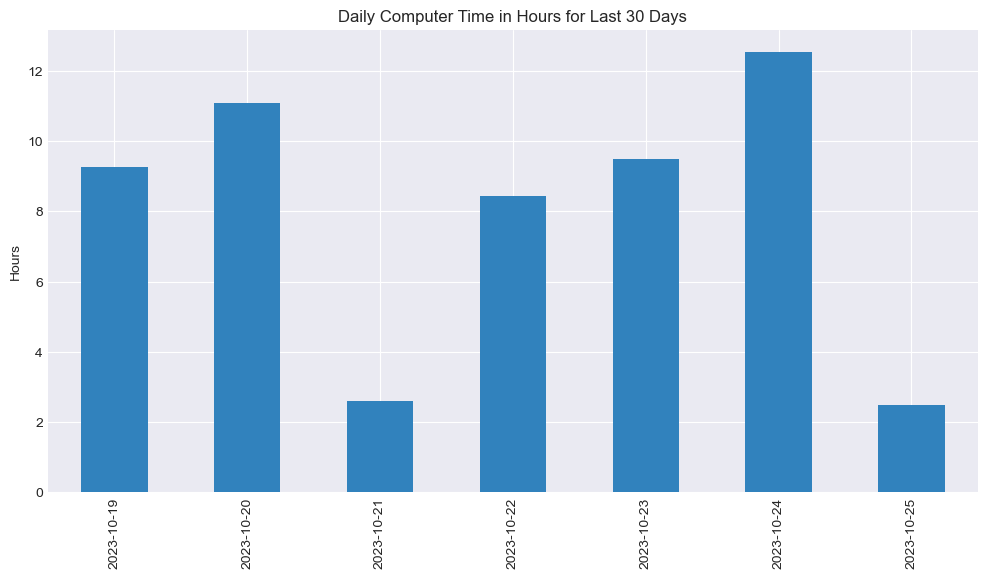

In [15]:
# Total Computer Time per Day -> computers
total_computer_time_by_date = activities[activities['device'] == "computers"].groupby(['Date'])['time'].sum().reset_index(name='time')
total_computer_time_by_date['Minutes'] = round(total_computer_time_by_date['time'] / 60, 2)
total_computer_time_by_date['Hours'] = round(total_computer_time_by_date['time'] / 60 / 60, 2)
total_computer_time_by_date = total_computer_time_by_date.drop(['time', 'Minutes'], axis=1)
total_computer_time_by_date = total_computer_time_by_date.set_index(['Date'])
chart_title = 'Daily Computer Time in Hours for Last 30 Days'
plt.style.use('seaborn-darkgrid')
ax = total_computer_time_by_date.tail(30).plot.bar(stacked=True, rot=90, figsize=(12,6), colormap='tab20c', legend=False)
ax.set_xlabel('')
ax.set_ylabel('Hours')
ax.set_title(chart_title)
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\922132555.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


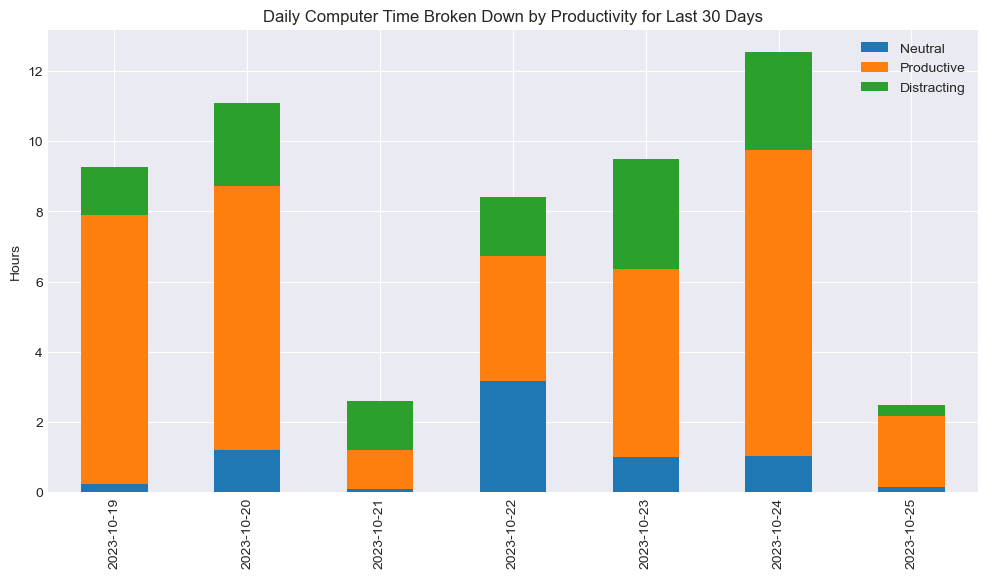

In [28]:
# Daily Productivity # for all activities: activities[activities['device'].isnull()]
total_by_date_productivity = activities[activities['device'] == "computers"].groupby(['Date', 'Productive'])['time'].sum().reset_index(name='time')
total_by_date_productivity['Minutes'] = round((total_by_date_productivity['time'] / 60), 2)
# total_by_date_productivity
table = total_by_date_productivity.pivot_table(index='Date', columns='Productive', values='time', aggfunc=np.sum)
# process and simplify productivity dimensions
days_productive_time = table.copy()
days_productive_time['productive_simple'] = days_productive_time['productive'] + days_productive_time['very productive']
days_productive_time.drop(['productive', 'very productive'], axis=1, inplace=True)
days_productive_time['distracting_simple'] = days_productive_time['distracting'] + days_productive_time['very distracting']
days_productive_time.drop(['distracting', 'very distracting'], axis=1, inplace=True)
days_productive_time.columns = ['Neutral', 'Productive', 'Distracting']
chart_title = 'Daily Computer Time Broken Down by Productivity for Last 30 Days'
plt.style.use('seaborn-darkgrid')
ax = (days_productive_time.tail(30)/3600).plot.bar(stacked=True, rot=90, figsize=(12,6))
ax.set_xlabel('')
ax.set_ylabel('Hours')
ax.set_title(chart_title)
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\912796307.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


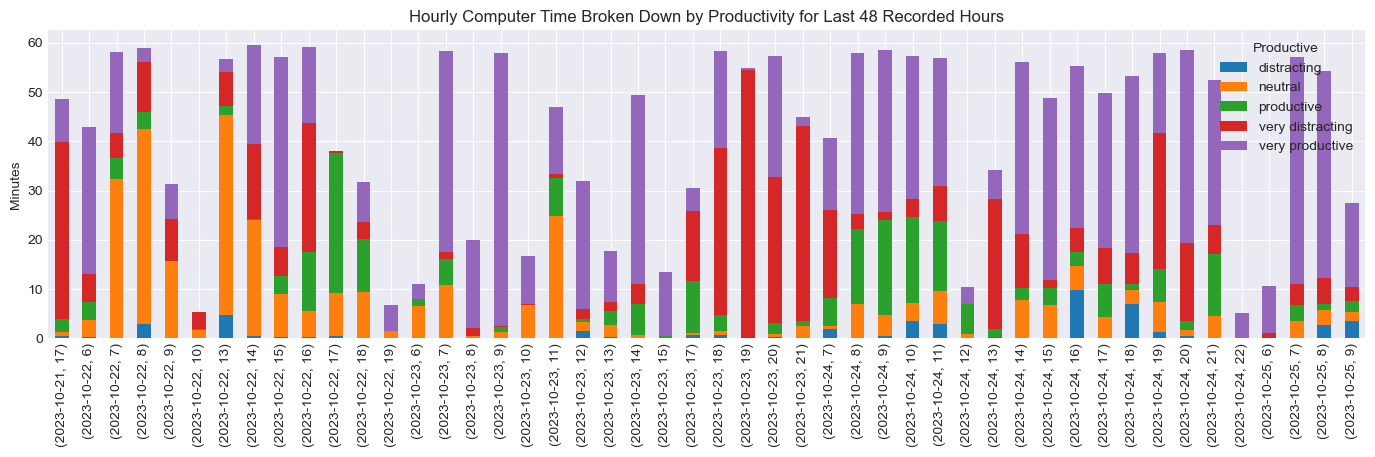

In [30]:
# productive hours
hourly = activities[activities['device'] == "computers"].groupby(['Date', 'Hour', 'Productive'])['time'].sum().reset_index(name='time')
hourly['Minutes'] = round((hourly['time'] / 60), 2)
hourly_breakdown = hourly.pivot_table(index=['Date', 'Hour'], columns='Productive', values='Minutes', aggfunc=np.sum)
chart_title = 'Hourly Computer Time Broken Down by Productivity for Last 48 Recorded Hours'
plt.style.use('seaborn-darkgrid')
ax = hourly_breakdown.tail(48).plot.bar(stacked=True, rot=90, figsize=(17,4))
ax.set_xlabel('')
ax.set_ylabel('Minutes')
ax.set_title(chart_title)
plt.show()


C:\Users\james\AppData\Local\Temp\ipykernel_17972\2382137413.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


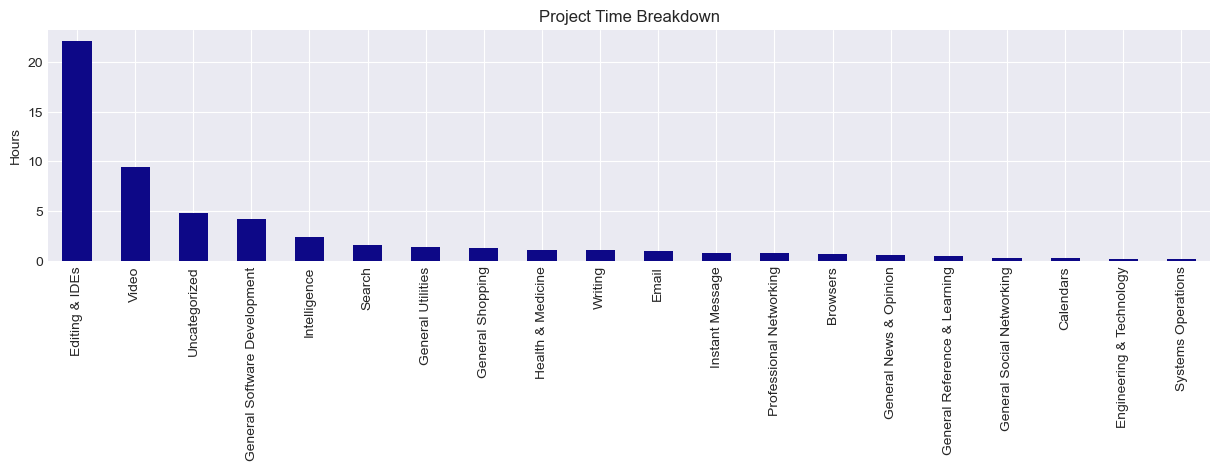

In [32]:
# Category Breakdown of Time Usage
# Categories
categories = activities[activities['device'] == "computers"].pivot_table(index=['category'], values='time', aggfunc=np.sum).sort_values(by='time', ascending=False)
categories['Hours'] = round(categories['time'] / 60 / 60, 1)
# Chart Project Time
dataset = categories.head(20)
chart_title = 'Project Time Breakdown'

plt.style.use('seaborn-darkgrid')
ax = dataset.plot.bar(y='Hours', figsize=(15, 3), rot=90, colormap='plasma', legend=False)
ax.set_ylabel('Hours')
ax.set_xlabel('')

ax.set_title(chart_title)
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\1064334676.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


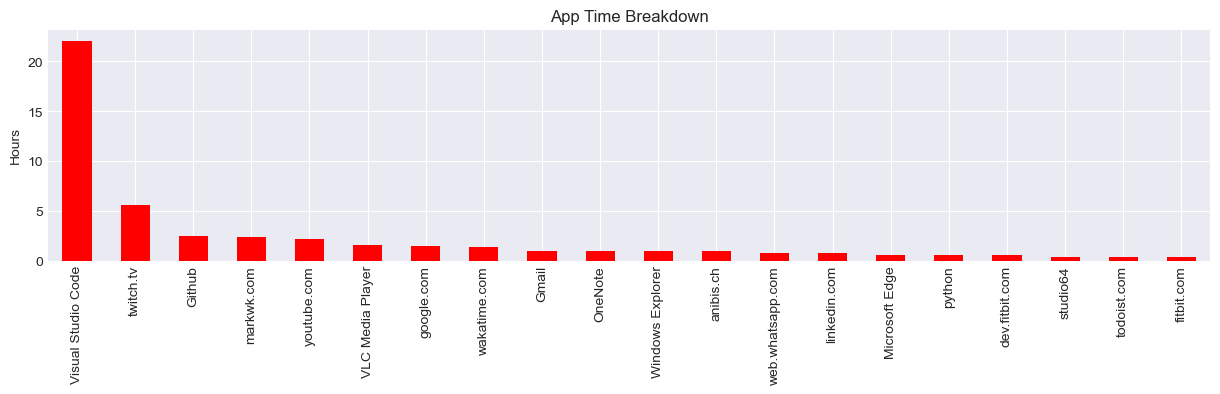

In [34]:
# Category Breakdown of Time Usage
# Categories
apps = activities[activities['device'] == "computers"].pivot_table(index=['activity'], values='time', aggfunc=np.sum).sort_values(by='time', ascending=False)
apps['Hours'] = round(apps['time'] / 60 / 60, 1)
# Chart Project Time
dataset = apps.head(20)
chart_title = 'App Time Breakdown'

plt.style.use('seaborn-darkgrid')
ax = dataset.plot.bar(y='Hours', figsize=(15, 3), rot=90, colormap='autumn', legend=False)
ax.set_ylabel('Hours')
ax.set_xlabel('')

ax.set_title(chart_title)
plt.show()

In [36]:
# # Yearly Breakdown
# year_data = activities[activities['device'] == "computers"].groupby(['Year', 'Productive'])['time'].sum().reset_index(name='time')
# year_data['Hours'] = year_data['time'] / 60 / 60
# yearly_data = np.round(year_data.pivot_table(index=['Year'], columns='Productive', values='Hours', aggfunc=np.sum),2)
# # change order
# yearly_data = yearly_data[['very productive', 'productive', 'neutral', 'distracting', 'very distracting']]
# # Chart Yearly Time
# dataset = yearly_data[:-1]
# chart_title = 'Yearly Productive Time Breakdown'

# plt.style.use('seaborn-darkgrid')
# ax = dataset.plot.bar(figsize=(14, 5), rot=0, colormap='spring', stacked=True)
# ax.set_ylabel('Hours')
# ax.set_xlabel('')
# ax.legend(loc='upper left')
# ax.set_title(chart_title)
# plt.show()

In [37]:
# # Monthly Breakdown
# month_data = activities[activities['device'] == "computers"].groupby(['Mnth_yr', 'Productive'])['time'].sum().reset_index(name='time')
# month_data['Hours'] = month_data['time'] / 60 / 60
# monthly_data = np.round(month_data.pivot_table(index=['Mnth_yr'], columns='Productive', values='Hours', aggfunc=np.sum),2)
# # change order
# monthly_data = monthly_data[['very productive', 'productive', 'neutral', 'distracting', 'very distracting']]
# # Chart Monthly Time
# dataset = monthly_data[:-1].tail(24)
# chart_title = 'Monthly Productive Time Breakdown (Last 24 Months)'

# plt.style.use('seaborn-darkgrid')
# ax = dataset.plot.bar(figsize=(14, 5), rot=90, colormap='spring', stacked=True)
# ax.set_ylabel('Hours')
# ax.set_xlabel('')
# ax.legend(loc='best')
# ax.set_title(chart_title)
# plt.show()

In [38]:
# Rescuetime Usage Data Summary
# Life-time Project Time Summary
print('====== RescueTme Time Lifetime Summary ====== ')
print('Total Number of Tracked Days: {:,}'.format(len(total_computer_time_by_date)))
total_hours = round(total_computer_time_by_date['Hours'].sum().item(),2)
print('All-time Computer Time in Days: {:,}'.format(round(total_hours/24),1))
print('All-time Computer in Hours: {:,}'.format(total_hours))
daily_average = round(total_computer_time_by_date['Hours'].mean(),1)
print('Daily Average (of tracked days): {:,} hrs'.format(daily_average))
print(' ')

print('Top 5 Days with Most Hours:')
for index, row in total_computer_time_by_date.sort_values(by=['Hours'], ascending=False).head(5).iterrows():
    print("* " + str(row["Hours"]) + " hrs" + " on " + str(row.name))
print(' ')

print('Top 7 Apps by Usage:')
for index, row in apps.head(7).iterrows():
    print("* " + str(row["Hours"]) + " hrs" + ": " + str(row.name))
print(' ')

====== RescueTme Time Lifetime Summary ====== 
Total Number of Tracked Days: 7
All-time Computer Time in Days: 2
All-time Computer in Hours: 55.89
Daily Average (of tracked days): 8.0 hrs
 
Top 5 Days with Most Hours:
* 12.55 hrs on 2023-10-24
* 11.08 hrs on 2023-10-20
* 9.49 hrs on 2023-10-23
* 9.27 hrs on 2023-10-19
* 8.43 hrs on 2023-10-22
 
Top 7 Apps by Usage:
* 22.1 hrs: Visual Studio Code
* 5.6 hrs: twitch.tv
* 2.5 hrs: Github
* 2.4 hrs: markwk.com
* 2.2 hrs: youtube.com
* 1.6 hrs: VLC Media Player
* 1.5 hrs: google.com
 


In [47]:
def yearly_summary(year):
    print('====== {} RescueTime Summary ======'.format(year))
    # Data Setup
    activities_computer = activities[activities['device'] == "computers"]
    year_data = activities_computer[(activities_computer['Year'] == year)]

    year_time_dates = year_data.groupby(['Date'])['time'].sum().to_frame()
    year_time_dates['Hours'] = round(year_time_dates['time']/60/60,1)
    print('{:,} total computer time dates'.format(len(year_time_dates)))
    print('{:,} total computer hours'.format(round(year_time_dates['Hours'].sum(),2)))
    daily_average = round(year_time_dates['Hours'].mean(),1)
    print('Daily Average (of tracked days): {:,} hrs'.format(daily_average))
    print('')

    print('Top 5 Days with Most Hours:')
    for index, row in year_time_dates.sort_values(by=['Hours'], ascending=False).head(5).iterrows():
        print("* " + str(row["Hours"]) + " hrs on " + row.name)
    print(' ')

    print('Top 7 Categories:')
    year_categories = year_data.groupby(['category'])['time'].sum().to_frame()
    year_categories['Hours'] = round(year_categories['time']/60/60,1)
    for index, row in year_categories.sort_values(by=['Hours'], ascending=False).head(7).iterrows():
        print("* " + str(row["Hours"]) + " hrs on " + row.name)
    print(' ')

    print('Top 7 Apps:')
    year_categories = year_data.groupby(['category'])['time'].sum().to_frame()
    year_categories['Hours'] = round(year_categories['time']/60/60,1)
    for index, row in year_categories.sort_values(by=['Hours'], ascending=False).head(7).iterrows():
        print("* " + str(row["Hours"]) + " hrs on " + row.name)
    print(' ')

In [48]:
# Year in Review Data Analysis
# Set Year
target_year = 2023
# use existing data
days_productive_time = days_productive_time.reset_index()
days_productive_time.fillna(0, inplace=True)
days_productive_time['Date'] = pd.to_datetime(days_productive_time['Date'])
days_productive_time['Year'] = days_productive_time['Date'].dt.year
days_productive_time['Month'] = days_productive_time['Date'].dt.month
# General Summary
yearly_summary(year=target_year)

====== 2023 RescueTime Summary ======
7 total computer time dates
56.0 total computer hours
Daily Average (of tracked days): 8.0 hrs

Top 5 Days with Most Hours:
* 12.6 hrs on 2023-10-24
* 11.1 hrs on 2023-10-20
* 9.5 hrs on 2023-10-23
* 9.3 hrs on 2023-10-19
* 8.4 hrs on 2023-10-22
 
Top 7 Categories:
* 22.1 hrs on Editing & IDEs
* 9.4 hrs on Video
* 4.8 hrs on Uncategorized
* 4.2 hrs on General Software Development
* 2.4 hrs on Intelligence
* 1.6 hrs on Search
* 1.4 hrs on General Utilities
 
Top 7 Apps:
* 22.1 hrs on Editing & IDEs
* 9.4 hrs on Video
* 4.8 hrs on Uncategorized
* 4.2 hrs on General Software Development
* 2.4 hrs on Intelligence
* 1.6 hrs on Search
* 1.4 hrs on General Utilities
 


C:\Users\james\AppData\Local\Temp\ipykernel_17972\2809596801.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


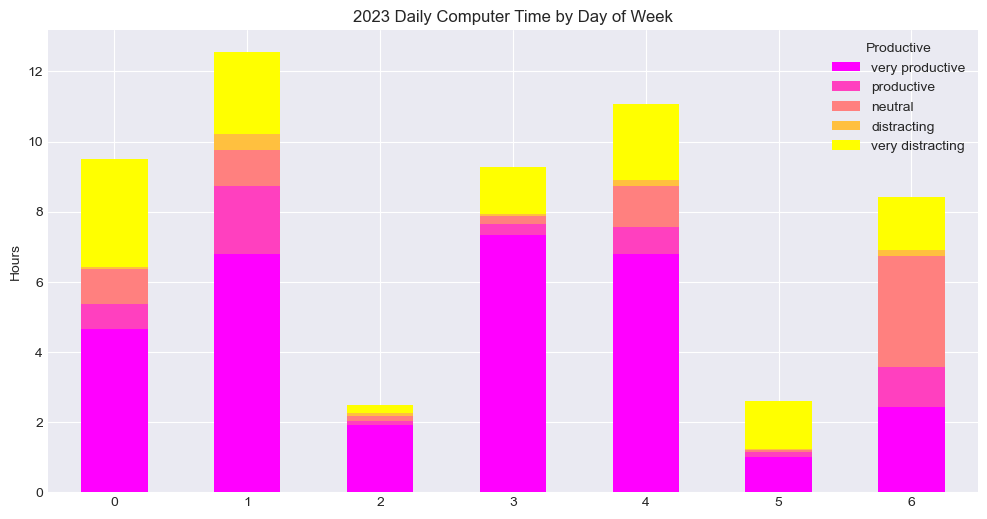

In [50]:
# Day of Week Comparison
def yearly_workspace_dow_chart(year):
    # Data Setup
    activities_computer = activities[activities['device'] == "computers"]
    year_data = activities_computer[(activities_computer['Year'] == year)]

    year_dow = year_data.groupby(['Date', 'Dow', 'Productive'])['time'].sum().reset_index(name='time')
    year_dow['Hours'] = year_dow['time'] / 60 / 60
    yearly_dow = np.round(year_dow.pivot_table(index=['Dow'], columns='Productive', values='Hours', aggfunc=np.mean),2)
    # change order
    yearly_dow = yearly_dow[['very productive', 'productive', 'neutral', 'distracting', 'very distracting']]

    chart_title = '{} Daily Computer Time by Day of Week'.format(year, yearly_dow.sum())
    plt.style.use('seaborn-darkgrid')
    ax = yearly_dow.plot.bar(stacked=True, rot=0, figsize=(12,6), colormap='spring')
    ax.set_xlabel('')
    ax.set_ylabel('Hours')
    ax.set_title(chart_title)
    plt.show()
yearly_workspace_dow_chart(year=target_year)

In [56]:
# RescueTime as a Yearly Heatmap Calendar
# Helper Function to Create Heat Map from Data
# Adapted from https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax


def year_heat_chart(year, productivity_type='All'):

    # Filter by Year
    year_data = days_productive_time[(days_productive_time['Year'] == year)].copy()

    if productivity_type == 'Productive':
        year_dates_data = year_data.groupby(['Date'])['Productive'].sum().reset_index(name='time')
    elif productivity_type == 'Distracting':
        year_dates_data = year_data.groupby(['Date'])['Distracting'].sum().reset_index(name='time')
    else: # all
        year_data['time'] = year_data['Neutral'] + year_data['Productive'] + year_data['Distracting']
        year_dates_data = year_data.groupby(['Date'])['time'].sum().reset_index(name='time')

    year_dates_data['Hours'] = year_dates_data['time'] / 60 / 60
    year_dates_data['Minutes'] = year_dates_data['time'] / 60

    # Generate all dates in that year
    first_date = str(year)+'-01-01'#runs_2018_dist['date'].head(1).values[0]
    last_date = str(year)+'-12-31'#runs_2018_dist['date'].tail(1).values[0]
    all_dates = pd.date_range(start=first_date, end=last_date)
    all_dates = pd.DataFrame(all_dates, columns=['Date'])

    # combine actual runs by date with total dates possible
    year_data = pd.merge(left=all_dates, right=year_dates_data,
                                 left_on="Date", right_on="Date", how="outer")
    year_data['Minutes'].fillna(0, inplace=True)
    year_data = year_data.set_index(pd.DatetimeIndex(year_data['Date']))

    max_daily_hours = round(year_data['Hours'].max(),0)

    # key stat and title
    total_hours = round(year_data['Hours'].sum(),1)
    chart_title = '{} RescueTime {} Time | Total Time {:,} Hrs'.format(year, productivity_type, total_hours)

    # set chart data
    data = pd.Series(year_data.Hours)
    data.index = year_data.index

    # plot data
    figsize = plt.figaspect(7 / 56)
    fig = plt.figure(figsize=figsize)
    ax = date_heatmap(data, edgecolor='black')
    max_hrs = int(round(data.max(),0))
    steps = int(round(max_hrs / 6, 0))
    plt.colorbar(ticks=range(0, max_hrs, steps), pad=0.02)
    cmap = mpl.cm.get_cmap('Greens', max_daily_hours)
    plt.set_cmap(cmap)
    plt.clim(0, max_daily_hours)
    ax.set_aspect('equal')
    ax.set_title(chart_title)
    plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\1953271618.py:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Greens', max_daily_hours)


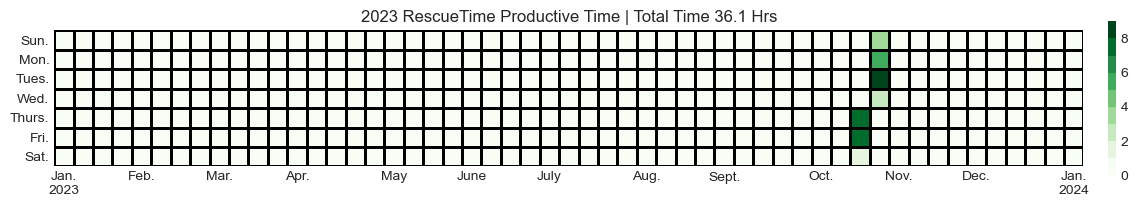

In [57]:
year_heat_chart(year=target_year, productivity_type='Productive')

C:\Users\james\AppData\Local\Temp\ipykernel_17972\1953271618.py:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Greens', max_daily_hours)


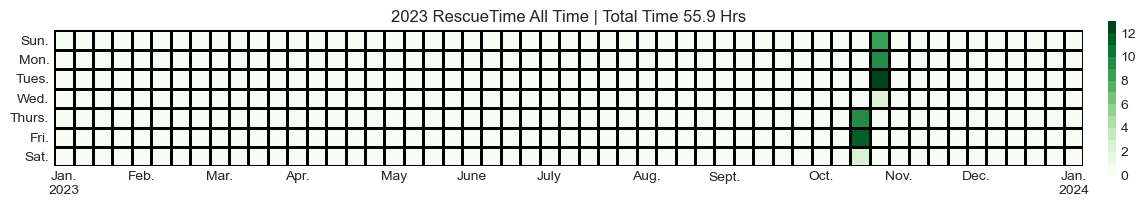

In [58]:
year_heat_chart(year=target_year, productivity_type='All')

In [59]:
# Monthly Breakdown
def yearly_month_chart(year):
    # Data Setup
    activities_computer = activities[activities['device'] == "computers"]
    year_data = activities_computer[(activities_computer['Year'] == year)]

    year_month = year_data.groupby(['Month', 'Productive'])['time'].sum().reset_index(name='time')
    year_month['Hours'] = year_month['time'] / 60 / 60
    year_monthly = np.round(year_month.pivot_table(index=['Month'], columns='Productive', values='Hours', aggfunc=np.mean),2)
    # change order
    year_monthly = year_monthly[['very productive', 'productive', 'neutral', 'distracting', 'very distracting']]

    chart_title = '{} Monthly RescueTime Hours'.format(year)

    plt.style.use('seaborn-darkgrid')
    ax = year_monthly.plot.bar(stacked=True, rot=0, figsize=(12,6), colormap='spring')
    ax.set_xlabel('')
    ax.set_ylabel('Hours')
    ax.set_title(chart_title)
    plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\2162022408.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


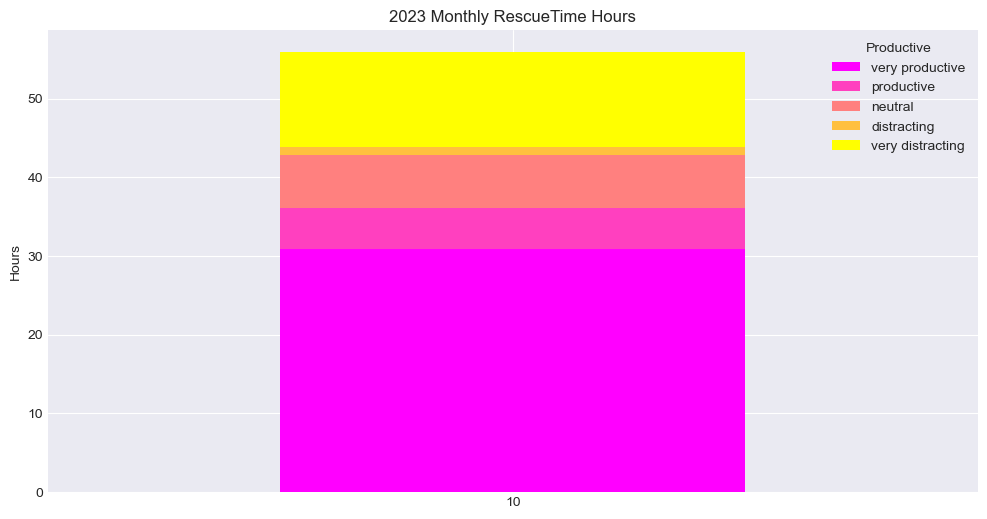

In [60]:
yearly_month_chart(year=target_year)

In [61]:
def yearly_hourly_chart(year):
    year_hours_data = hourly[(hourly['Year'] == year)]

    year_hours = year_hours_data.groupby(['Hour', 'Productive'])['time'].sum().reset_index(name='time')
    year_hours['Hours'] = year_hours['time'] / 60 / 60
    yearly_hours = np.round(year_hours.pivot_table(index=['Hour'], columns='Productive', values='Hours', aggfunc=np.mean),2)
    # change order
    yearly_hours = yearly_hours[['very productive', 'productive', 'neutral', 'distracting', 'very distracting']]

    chart_title = '{} RescueTime Hourly Breakdown'.format(year)

    plt.style.use('seaborn-darkgrid')
    ax = yearly_hours.plot.bar(stacked=True, rot=0, figsize=(12,6), colormap='spring')
    ax.set_xlabel('')
    ax.set_ylabel('Hours')
    ax.set_title(chart_title)
    plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\1624610539.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


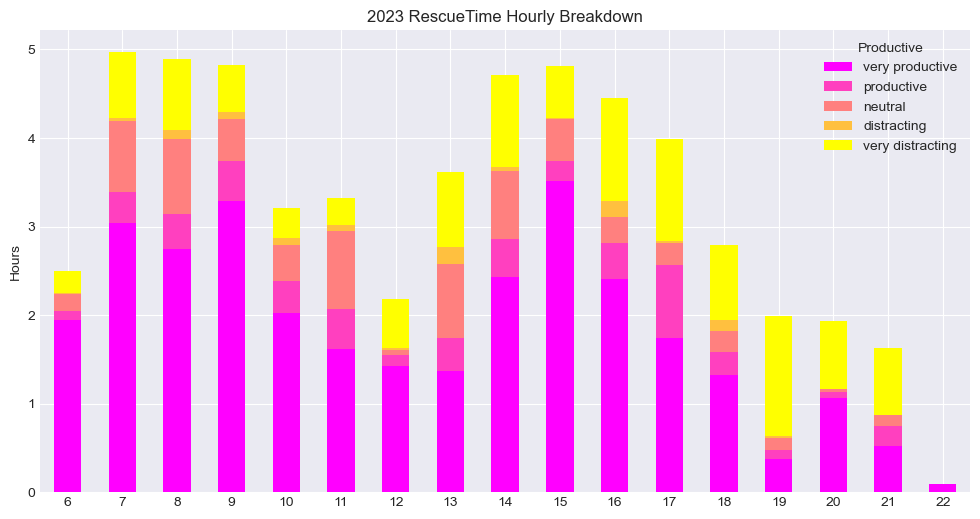

In [62]:
# Yearly Hourly Breakdown
hourly = activities[activities['device'] == "computers"].groupby(['Date', 'Hour', 'Productive'])['time'].sum().reset_index(name='time')
hourly['Minutes'] = round((hourly['time'] / 60), 2)
hourly['Date'] = pd.to_datetime(hourly['Date'])
hourly['Year'] = hourly['Date'].dt.year
yearly_hourly_chart(year=target_year)

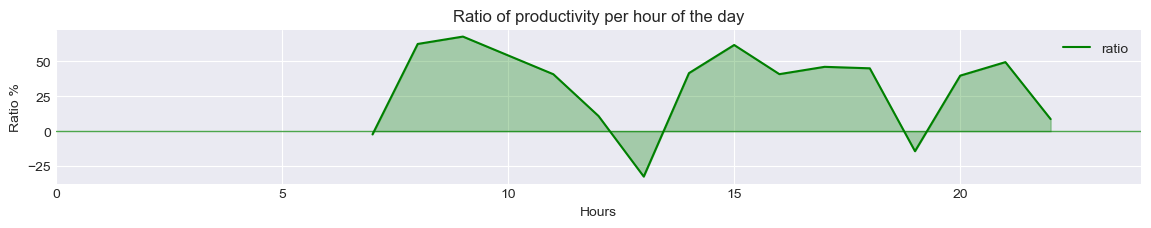

In [92]:
date = "2023-10-24"
hourly = activities[(activities['device'] == "computers") & (activities['Date'] == date)].groupby(['Hour', 'productivity'])['time'].sum().reset_index(name='time')
hourly['ratio'] = hourly['time']*hourly['productivity']
ratio = hourly[['Hour', 'ratio']].groupby("Hour").sum()
ratio = ratio/(2*3600)*100
# plt.style.use('seaborn-darkgrid')
ax = ratio.plot.line(figsize=(14,2), color='green')
# draw a horizontal line at zero and fill with green between curve and zero horizontal line
ax.axhline(y=0, color='green', linewidth=1, alpha=.7)
ax.fill_between(ratio.index, ratio['ratio'], color='green', alpha=0.3)
# TODO: increase grid density
ax.set_xlim(0, 24)
ax.set_xlabel('Hours')
ax.set_ylabel('Ratio %')
ax.set_title('Ratio of productivity per hour of the day')
plt.show()

In [110]:
# computer time vs phone time
computer_time = activities[activities['device'] == "computers"].groupby(['Date'])['time'].sum().reset_index(name='time')
mobile_time = activities[activities['device'] == "mobile"].groupby(['Date'])['time'].sum().reset_index(name='time')
# other_time = activities[activities['device'].isnull()].groupby(['Date'])['time'].sum().reset_index(name='time')

In [115]:
mobile_time['time']/3600

0    3.177222
1    1.598611
2    4.542222
3    1.614722
4    1.760278
5    2.906111
6    0.361667
Name: time, dtype: float64

In [116]:
computer_time['time']/3600

0     9.269722
1    11.081667
2     2.584722
3     8.425833
4     9.487500
5    12.553611
6     2.492500
Name: time, dtype: float64

In [117]:
computer_time = activities[activities['device'] == "computers"]
mobile_time = activities[activities['device'] == "mobile"]
other_time = activities[activities['device'].isnull()]
len(computer_time)+len(mobile_time)

4007

In [118]:
len(other_time)

4007

C:\Users\james\AppData\Local\Temp\ipykernel_17972\2141163094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_time['date'] = mobile_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":")[1])/60)
C:\Users\james\AppData\Local\Temp\ipykernel_17972\2141163094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computer_time['date'] = computer_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":"

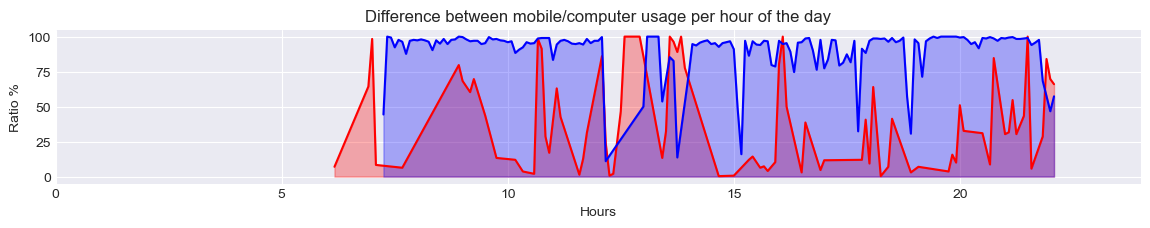

In [157]:
# Time spent on laptop vs mobile device
computer_time = activities[(activities['device'] == "computers") & (activities['Date'] == date)]
mobile_time = activities[(activities['device'] == "mobile") & (activities['Date'] == date)]
# remove the year, month, day in the date column and put the time as a float
mobile_time['date'] = mobile_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":")[1])/60)
computer_time['date'] = computer_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":")[1])/60)

mobile_data = mobile_time.groupby('date').sum()['time']/3 #5min*60s=300 -> in % -> 3
computer_data = computer_time.groupby('date').sum()['time']/3
ax = mobile_data.plot.line(figsize=(14,2), color='red')
ax = computer_data.plot.line(figsize=(14,2), color='blue')
# draw a horizontal line at zero and fill with green between curve and zero horizontal line
# ax.axhline(y=0, color='green', linewidth=1, alpha=.7)
ax.fill_between(mobile_data.index, mobile_data, color='red', alpha=0.3)
ax.fill_between(computer_data.index, computer_data, color='blue', alpha=0.3)
# TODO: increase grid density
ax.set_xlim(0, 24)
ax.set_xlabel('Hours')
ax.set_ylabel('Ratio %')
ax.set_title('Difference between mobile/computer usage per hour of the day')
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_17972\2031664911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_time['date'] = mobile_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":")[1])/60)
C:\Users\james\AppData\Local\Temp\ipykernel_17972\2031664911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computer_time['date'] = computer_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":"

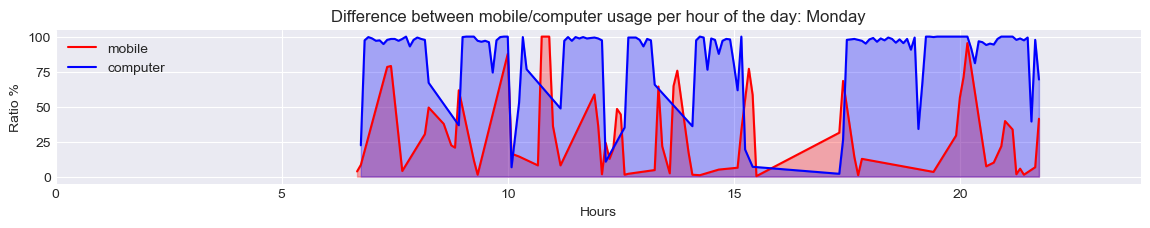

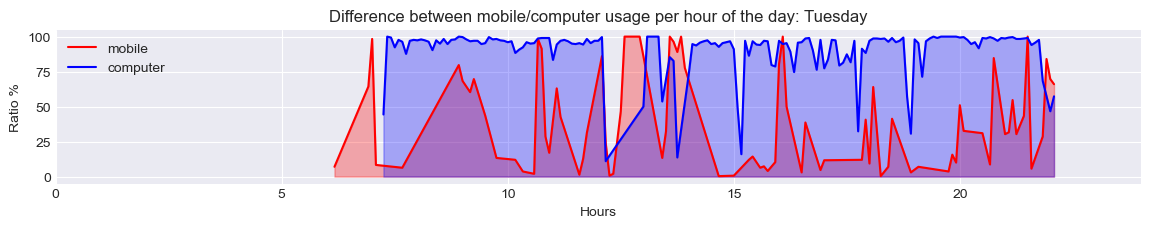

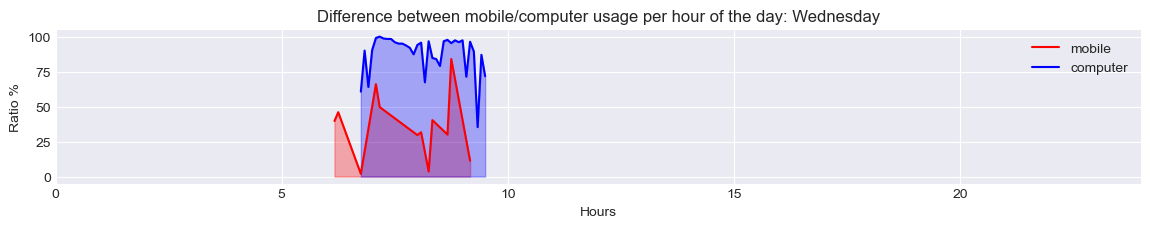

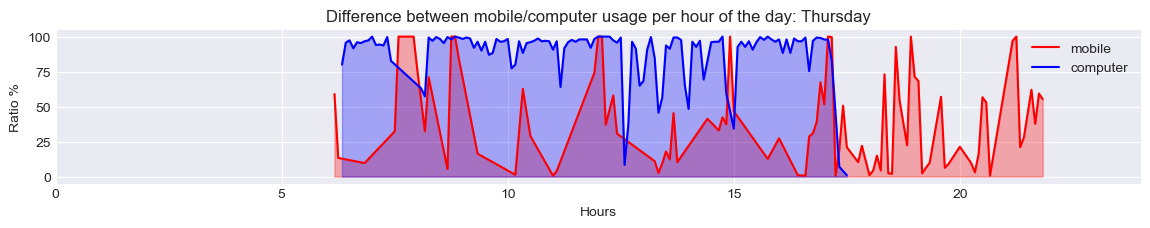

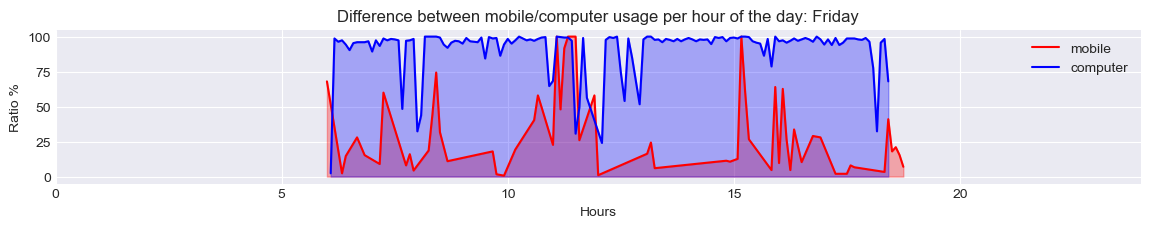

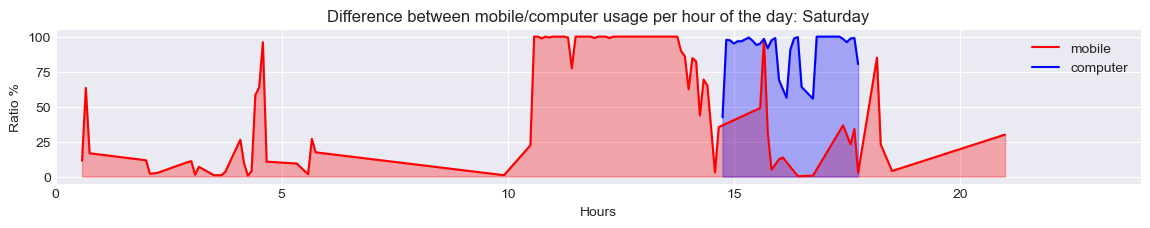

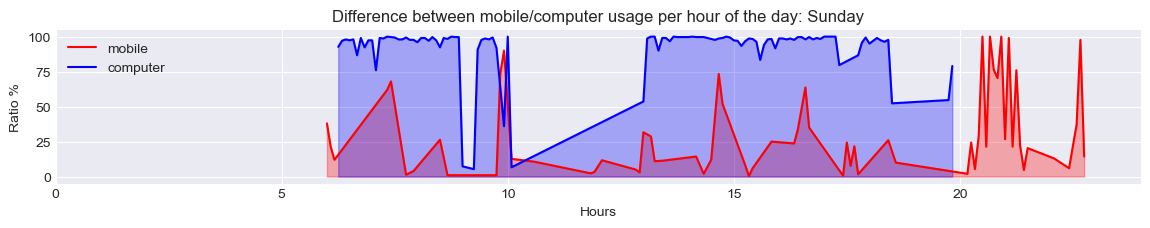

In [205]:
# let's do the same but by grouping by day of the week
# Time spent on laptop vs mobile device
computer_time = activities[activities['device'] == "computers"]
mobile_time = activities[activities['device'] == "mobile"]
# remove the year, month, day in the date column and put the time as a float
mobile_time['date'] = mobile_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":")[1])/60)
computer_time['date'] = computer_time['date'].apply(lambda x: int(x.strftime('%H:%M:%S').split(":")[0])+int(x.strftime('%H:%M:%S').split(":")[1])/60)

mobile_by_dow = mobile_time.groupby(['Dow', 'date']).sum()['time']
computer_by_dow = computer_time.groupby(['Dow', 'date']).sum()['time']

for i in range(7):
    mobile_data = mobile_by_dow.unstack(level=0)[i].dropna()/3
    computer_data = computer_by_dow.unstack(level=0)[i].dropna()/3
    ax = mobile_data.plot.line(figsize=(14,2), color='red', label='mobile')
    ax = computer_data.plot.line(figsize=(14,2), color='blue', label='computer')
    # draw a horizontal line at zero and fill with green between curve and zero horizontal line
    # ax.axhline(y=0, color='green', linewidth=1, alpha=.7)
    ax.fill_between(mobile_data.index, mobile_data, color='red', alpha=0.3)
    ax.fill_between(computer_data.index, computer_data, color='blue', alpha=0.3)
    # TODO: increase grid density
    text = None
    if i == 0: text = "Monday"
    elif i == 1: text = "Tuesday"
    elif i == 2: text = "Wednesday"
    elif i == 3: text = "Thursday"
    elif i == 4: text = "Friday"
    elif i == 5: text = "Saturday"
    elif i == 6: text = "Sunday"
    ax.set_xlim(0, 24)
    ax.set_xlabel('Hours')
    ax.set_ylabel('Ratio %')
    ax.set_title(f'Difference between mobile/computer usage per hour of the day: {text}')
    plt.legend()
    plt.show()

#TODO: maybe change dropna to just zero